In [61]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime#
import calendar

In [50]:
filepath = 'data/sample_data.csv'
df = pd.read_csv(filepath)
df.sample(9)

,expense,amount,start_date,end_date,bill_granularity,status,beneficiary
0,car insurance,200,07/03/2022,12/07/2023,monthly,inactive,chris
3,electronics,70,06/05/2022,08/07/2025,yearly,active,barry
5,subscriptions,190,10/21/2021,12/17/2023,yearly,active,diana
4,clothing,350,03/10/2022,07/31/2024,yearly,active,diana
2,groceries,70,09/09/2022,03/26/2024,yearly,inactive,chris
1,subscriptions,330,01/04/2022,12/08/2023,yearly,active,barry
7,education,390,04/19/2023,08/22/2023,yearly,inactive,diana
6,education,470,04/11/2022,06/10/2025,monthly,inactive,alan
8,electronics,70,01/06/2022,03/04/2025,monthly,active,diana


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   expense           9 non-null      object
 1   amount            9 non-null      int64 
 2   start_date        9 non-null      object
 3   end_date          9 non-null      object
 4   bill_granularity  9 non-null      object
 5   status            9 non-null      object
 6   beneficiary       9 non-null      object
dtypes: int64(1), object(6)
memory usage: 632.0+ bytes


In [52]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   expense           9 non-null      object        
 1   amount            9 non-null      int64         
 2   start_date        9 non-null      datetime64[ns]
 3   end_date          9 non-null      datetime64[ns]
 4   bill_granularity  9 non-null      object        
 5   status            9 non-null      object        
 6   beneficiary       9 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 632.0+ bytes


## Cost vs Month for active expenses

In [54]:
df.head()

,expense,amount,start_date,end_date,bill_granularity,status,beneficiary
0,car insurance,200,2022-07-03,2023-12-07,monthly,inactive,chris
1,subscriptions,330,2022-01-04,2023-12-08,yearly,active,barry
2,groceries,70,2022-09-09,2024-03-26,yearly,inactive,chris
3,electronics,70,2022-06-05,2025-08-07,yearly,active,barry
4,clothing,350,2022-03-10,2024-07-31,yearly,active,diana


In [55]:
df['start_month'] = df['start_date'].dt.month
df['end_month'] = df['end_date'].dt.month

In [58]:
df

,expense,amount,start_date,end_date,bill_granularity,status,beneficiary,start_month,end_month
0,car insurance,200,2022-07-03,2023-12-07,monthly,inactive,chris,7,12
1,subscriptions,330,2022-01-04,2023-12-08,yearly,active,barry,1,12
2,groceries,70,2022-09-09,2024-03-26,yearly,inactive,chris,9,3
3,electronics,70,2022-06-05,2025-08-07,yearly,active,barry,6,8
4,clothing,350,2022-03-10,2024-07-31,yearly,active,diana,3,7
5,subscriptions,190,2021-10-21,2023-12-17,yearly,active,diana,10,12
6,education,470,2022-04-11,2025-06-10,monthly,inactive,alan,4,6
7,education,390,2023-04-19,2023-08-22,yearly,inactive,diana,4,8
8,electronics,70,2022-01-06,2025-03-04,monthly,active,diana,1,3


In [77]:
monthly_df = df[df['bill_granularity'] == 'monthly']
yearly_df = df[df['bill_granularity'] == 'yearly']

months = range(1, 13)

total_amounts_monthly = [monthly_df[(monthly_df['start_month'] <= month) & (monthly_df['end_month'] >= month)]['amount'].sum() for month in months]
total_amounts_yearly = [yearly_df[(yearly_df['start_month'] <= month) & (yearly_df['end_month'] >= month)]['amount'].sum() for month in months]


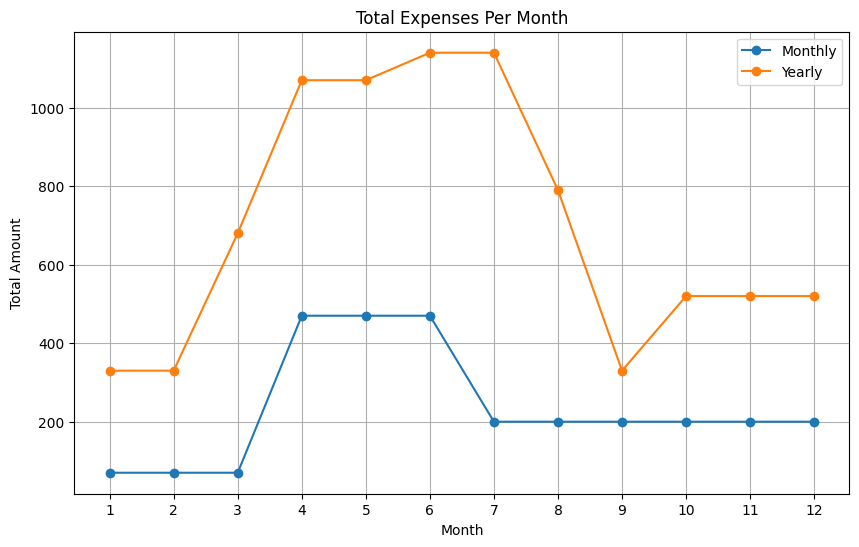

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(months, total_amounts_monthly, marker='o', label='Monthly')
plt.plot(months, total_amounts_yearly, marker='o', label='Yearly')

plt.title("Total Expenses Per Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(months)
plt.legend()  # Add a legend
plt.grid(True)
plt.show()